In [2]:
import csv
import random
import pandas as pd

# Define the fruit names, size categories, and color categories
fruits = ["Apple", "Banana", "Orange", "Strawberry", "Grape", "Lemon", "Pineapple", "Cherry", "Blueberry", "Kiwi", "Mango", "Watermelon", "Peach", "Plum", "Pear"]
sizes = ["Small", "Medium", "Large"]
colors = ["Red", "Yellow", "Orange", "Purple", "Green", "Blue"]

# Create a list to store the dataset
dataset = []

# Generate 200 random samples
for _ in range(200):
    fruit = random.choice(fruits)
    size = random.choice(sizes)
    color = random.choice(colors)
    dataset.append([fruit, size, color])

# Create a DataFrame from the dataset
df = pd.DataFrame(dataset, columns=["Fruit", "Size", "Color"])

# One-hot encode the Size and Color columns
df_encoded = pd.get_dummies(df, columns=["Size", "Color"], dtype=int)

# Write the encoded dataset to a CSV file
df_encoded.to_csv("fruit_dataset_encoded_numeric.csv", index=False)

print("Dataset with 200 samples one-hot encoded as numeric values and saved as 'fruit_dataset_encoded_numeric.csv'.")


Dataset with 200 samples one-hot encoded as numeric values and saved as 'fruit_dataset_encoded_numeric.csv'.


C:\Users\awotoroe\.conda\envs\jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


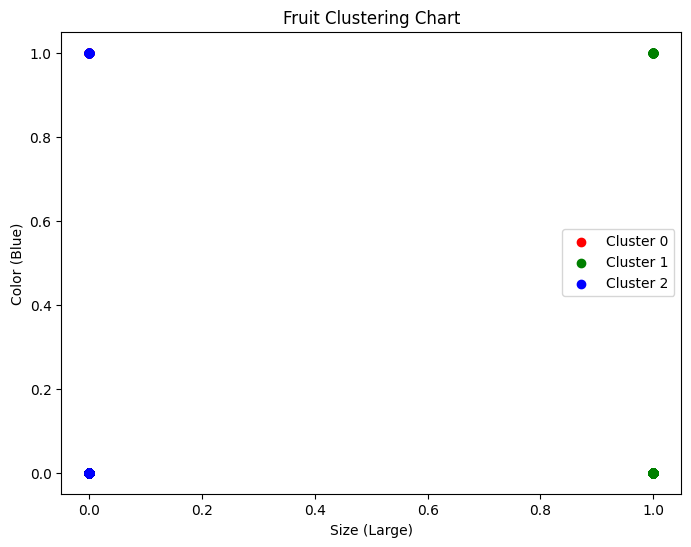

Dataset with 200 samples one-hot encoded as numeric values and clustered using K-means saved as 'fruit_dataset_encoded_clustered.csv'.


In [4]:
import csv
import random
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the fruit names, size categories, and color categories
fruits = ["Apple", "Banana", "Orange", "Strawberry", "Grape", "Lemon", "Pineapple", "Cherry", "Blueberry", "Kiwi", "Mango", "Watermelon", "Peach", "Plum", "Pear"]
sizes = ["Small", "Medium", "Large"]
colors = ["Red", "Yellow", "Orange", "Purple", "Green", "Blue"]

# Create a list to store the dataset
dataset = []

# Generate 200 random samples
for _ in range(1000):
    fruit = random.choice(fruits)
    size = random.choice(sizes)
    color = random.choice(colors)
    dataset.append([fruit, size, color])

# Create a DataFrame from the dataset
df = pd.DataFrame(dataset, columns=["Fruit", "Size", "Color"])

# One-hot encode the Size and Color columns
df_encoded = pd.get_dummies(df, columns=["Size", "Color"], dtype=int)

# Perform clustering with K-means
n_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded.drop(columns=['Fruit']))

# Write the encoded and clustered dataset to a CSV file
df_encoded.to_csv("fruit_dataset_encoded_clustered.csv", index=False)

# Plot the clustering chart
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Define colors for clusters
for cluster_num in range(n_clusters):
    cluster_data = df_encoded[df_encoded['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Size_Large'], cluster_data['Color_Blue'], label=f'Cluster {cluster_num}', c=colors[cluster_num])

plt.xlabel("Size (Large)")
plt.ylabel("Color (Blue)")
plt.title("Fruit Clustering Chart")
plt.legend()
plt.show()

print("Dataset with 200 samples one-hot encoded as numeric values and clustered using K-means saved as 'fruit_dataset_encoded_clustered.csv'.")
